In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind

# File paths (replace with your actual file paths)
chess_url = 'C:\\Users\\kosot\\OneDrive\\Masaüstü\\CS210-HW2\\Project\\DSA210_Term_Project_bugrahan.yapilmisev\\Data_Extraction\\filtered_chess_games_modified_png.csv'
academic_url = 'C:\\Users\\kosot\\OneDrive\\Masaüstü\\CS210-HW2\\Project\\DSA210_Term_Project_bugrahan.yapilmisev\\Data_Extraction\\exam_and_assignment_dates.csv'

# Load the data
chess_data = pd.read_csv(chess_url)
academic_data = pd.read_csv(academic_url)

# Preprocess chess data
chess_data['end_time'] = pd.to_datetime(chess_data['end_time'])
chess_data['date'] = chess_data['end_time'].dt.date
chess_data['win'] = chess_data['result_standardized'].apply(lambda x: 1 if x == 'win' else 0)

# Aggregate chess data by day
daily_chess = chess_data.groupby('date').agg(
    chess_count=('url', 'size'),
    win_rate=('win', 'mean')
).reset_index()

# Preprocess academic data
academic_data['date'] = pd.to_datetime(academic_data['date'], format='%d/%m/%Y').dt.date

# Extend workload over the previous 10 days (including the current day)
extended_workload = []
for _, row in academic_data.iterrows():
    for offset in range(0, 11):  # Include current day and 10 previous days
        extended_workload.append({'date': row['date'] - pd.Timedelta(days=offset), 'workload': 1})

extended_workload = pd.DataFrame(extended_workload)
daily_workload = extended_workload.groupby('date').sum().reset_index()

# Merge datasets
merged_data = pd.merge(daily_chess, daily_workload, on='date', how='outer').fillna(0)

# Filter for Fall and Spring terms
merged_data['date'] = pd.to_datetime(merged_data['date'])
fall_and_spring = merged_data[
    ((merged_data['date'].dt.month >= 9) & (merged_data['date'].dt.month <= 12)) |  # Fall months
    ((merged_data['date'].dt.month >= 1) & (merged_data['date'].dt.month <= 5))    # Spring months
]

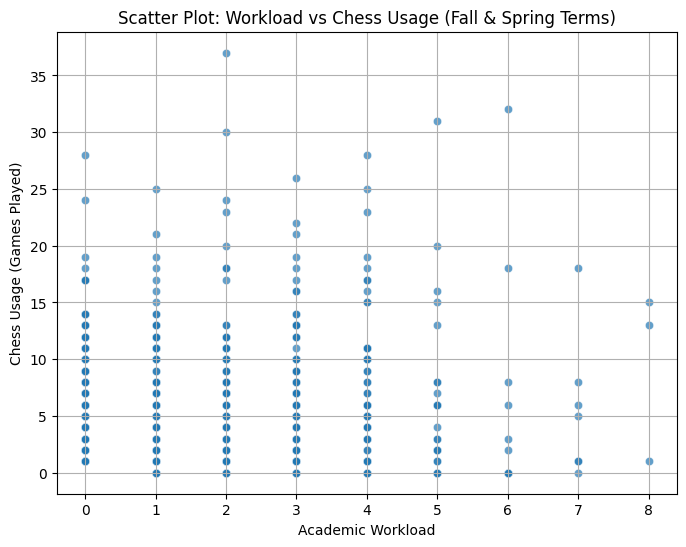

In [64]:
# Visualization 1: Scatter Plot (Workload vs Chess Usage)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='workload', y='chess_count', data=fall_and_spring, alpha=0.7)
plt.xlabel('Academic Workload')
plt.ylabel('Chess Usage (Games Played)')
plt.title('Scatter Plot: Workload vs Chess Usage (Fall & Spring Terms)')
plt.grid(True)
plt.show()

# Export the data used in the scatter plot to JSON
fall_and_spring[['workload', 'chess_count']].to_json("scatter_plot.json", orient="records")


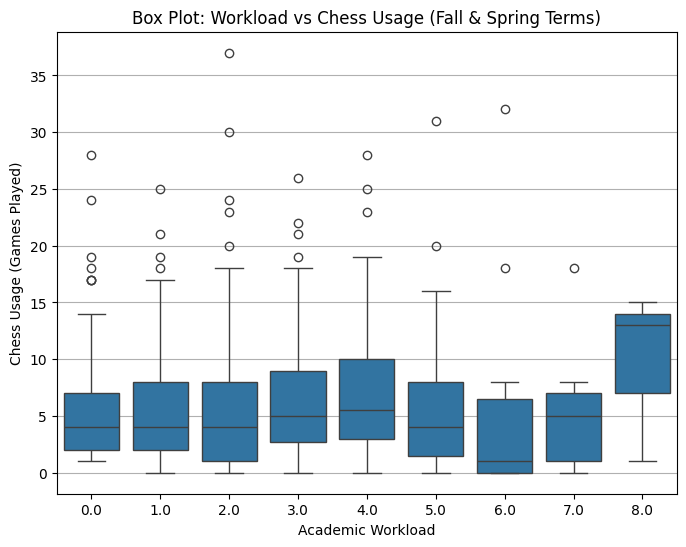

In [65]:
# Visualization 2: Box Plot (Workload vs Chess Usage)
plt.figure(figsize=(8, 6))
sns.boxplot(x='workload', y='chess_count', data=fall_and_spring)
plt.xlabel('Academic Workload')
plt.ylabel('Chess Usage (Games Played)')
plt.title('Box Plot: Workload vs Chess Usage (Fall & Spring Terms)')
plt.grid(axis='y')
plt.show()

# Export the data used in the scatter plot to JSON
fall_and_spring[['workload', 'chess_count']].to_json("box_plot.json", orient="records")

C:\Users\kosot\AppData\Local\Temp\ipykernel_18748\269158082.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workload', y='chess_count', data=average_usage, palette='Blues_d')


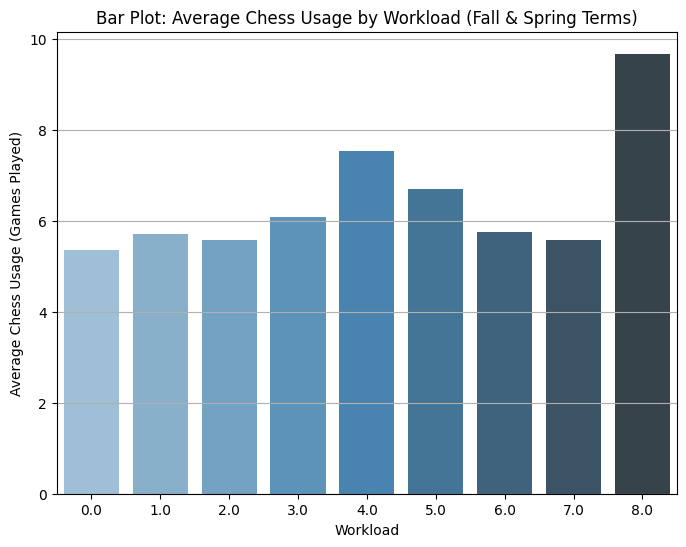

In [66]:
# Visualization 3: Bar Plot: Average Chess Usage by Workload Level (Fall & Spring Terms)
average_usage = fall_and_spring.groupby('workload')['chess_count'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='workload', y='chess_count', data=average_usage, palette='Blues_d')
plt.xlabel('Workload')
plt.ylabel('Average Chess Usage (Games Played)')
plt.title('Bar Plot: Average Chess Usage by Workload (Fall & Spring Terms)')
plt.grid(axis='y')
plt.show()

# Export the data used in the scatter plot to JSON
fall_and_spring[['workload', 'chess_count']].to_json("bar_plot.json", orient="records")

C:\Users\kosot\AppData\Local\Temp\ipykernel_18748\4140508264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='workload', y='chess_count', data=fall_and_spring, palette="Blues", inner="quartile")


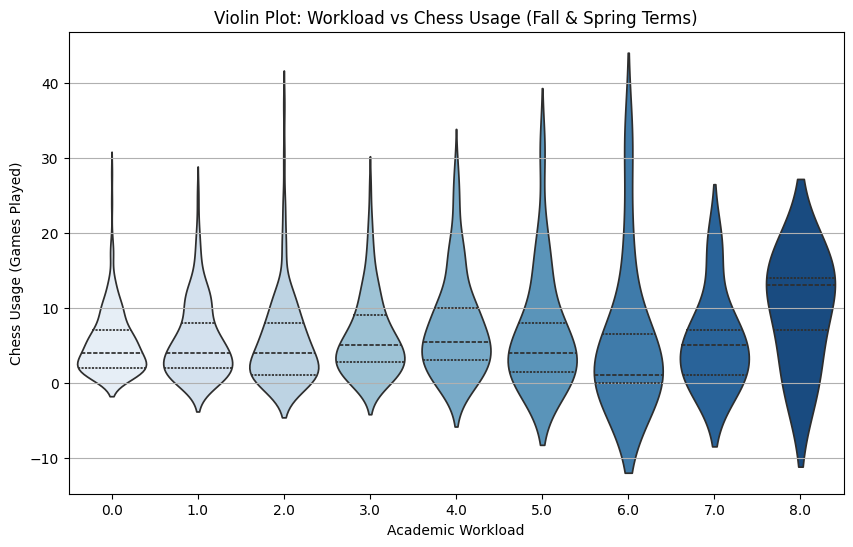

In [67]:
# Violin Plot: Workload vs Chess Usage
plt.figure(figsize=(10, 6))
sns.violinplot(x='workload', y='chess_count', data=fall_and_spring, palette="Blues", inner="quartile")
plt.xlabel('Academic Workload')
plt.ylabel('Chess Usage (Games Played)')
plt.title('Violin Plot: Workload vs Chess Usage (Fall & Spring Terms)')
plt.grid(axis='y')
plt.show()


# Export the data used in the scatter plot to JSON
fall_and_spring[['workload', 'chess_count']].to_json("violin_plot.json", orient="records")

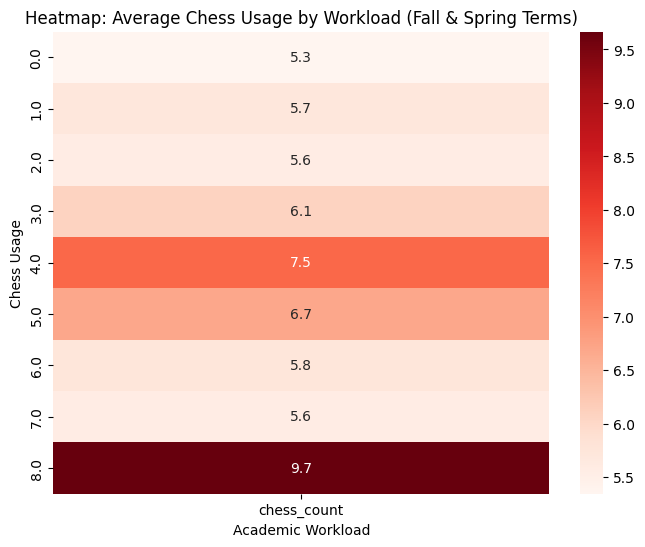

In [68]:
# Heatmap: Workload vs Average Chess Usage
# Prepare data for the heatmap
heatmap_data = fall_and_spring.groupby('workload')['chess_count'].mean().reset_index()

# Pivot the data for heatmap (here, no need for 'columns')
heatmap_pivot = heatmap_data.set_index('workload')  # Use workload as the index

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap="Reds", cbar=True)
plt.xlabel("Academic Workload")
plt.ylabel("Chess Usage")
plt.title("Heatmap: Average Chess Usage by Workload (Fall & Spring Terms)")
plt.show()

# Export the data used in the scatter plot to JSON
fall_and_spring[['workload', 'chess_count']].to_json("heatmap.json", orient="records")

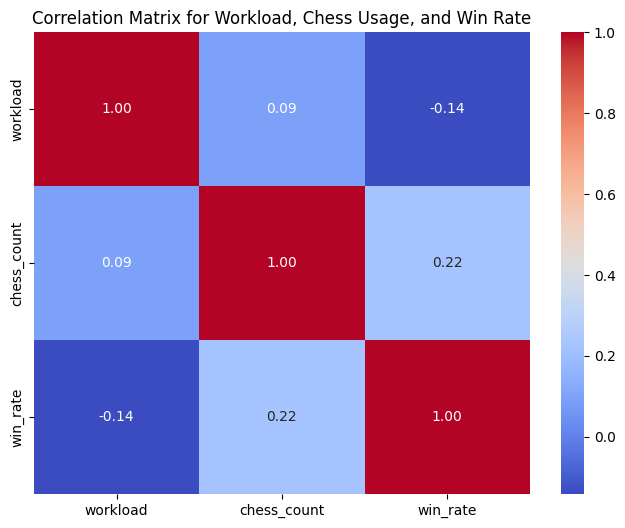

In [69]:
# Additional Correlation Analysis: Heatmap
correlation_matrix = fall_and_spring[['workload', 'chess_count', 'win_rate']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Workload, Chess Usage, and Win Rate')
plt.show()

# Export the data used in the scatter plot to JSON
fall_and_spring[['workload', 'chess_count']].to_json("correlation_matrix.json", orient="records")


Detailed Hypothesis Testing with Visualization:
Step 1: Original correlation (Workload vs Chess Usage): 0.09
Step 3: P-value calculated: 0.01370


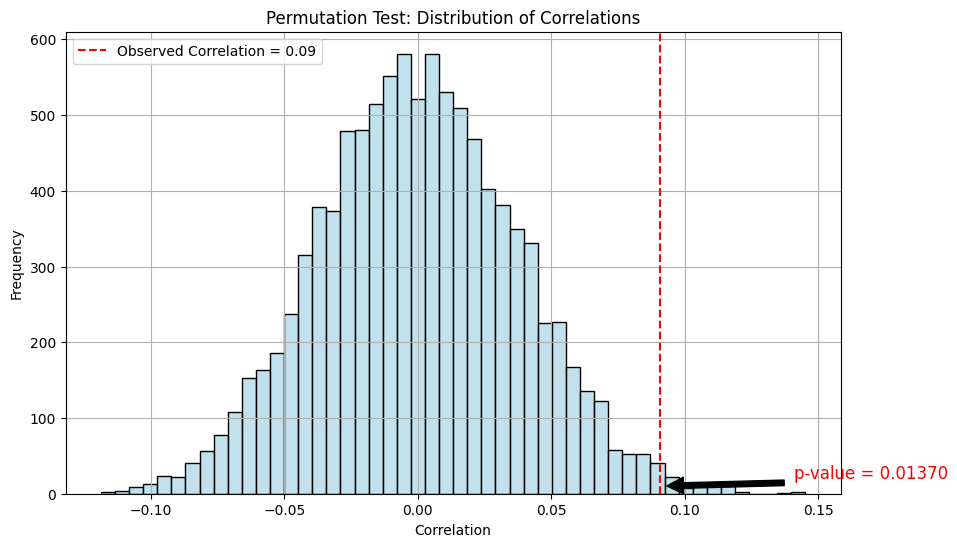


Step 4: Interpretation of Results
  Final Correlation: 0.09
  P-value: 0.01370
Result: There is significant evidence that chess usage is related to workload.
Conclusion: Hypothesis supported. Chess usage increases with academic workload.


In [74]:
import json
# Hypothesis Testing with Detailed Visualization
def permutation_test_visual(data, workload_col, usage_col, n_permutations=10000):
    # Step 1: Calculate the original correlation
    original_corr, _ = pearsonr(data[workload_col], data[usage_col])
    print(f"Step 1: Original correlation (Workload vs Chess Usage): {original_corr:.2f}")
    
    # Step 2: Generate permuted correlations
    permuted_corrs = []
    for _ in range(n_permutations):
        shuffled_usage = np.random.permutation(data[usage_col])
        perm_corr, _ = pearsonr(data[workload_col], shuffled_usage)
        permuted_corrs.append(perm_corr)
    
    # Step 3: Calculate the p-value
    p_value = np.mean(np.abs(permuted_corrs) >= np.abs(original_corr))
    print(f"Step 3: P-value calculated: {p_value:.5f}")
    
    # Step 4: Visualization of the permutation distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(permuted_corrs, bins=50, kde=False, color="lightblue")
    plt.axvline(original_corr, color='red', linestyle='--', label=f'Observed Correlation = {original_corr:.2f}')
    plt.title("Permutation Test: Distribution of Correlations")
    plt.xlabel("Correlation")
    plt.ylabel("Frequency")
    plt.legend()
    
    # Annotate p-value
    plt.annotate(f'p-value = {p_value:.5f}', 
                 xy=(original_corr, 10), 
                 xytext=(original_corr + 0.05, 20), 
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=12, color='red')
    plt.grid(True)
    plt.show()
    # Prepare data for JSON export
    json_data = {
        "original_correlation": original_corr,
        "p_value": p_value,
        "permuted_correlations": permuted_corrs  # List of permuted correlations
    }
    
    # Save data to JSON
    with open("p_test_plot.json", "w") as f:
        json.dump(json_data, f, indent=4)
    
    return original_corr, p_value,permuted_corrs

# Apply the visual permutation test
print("\nDetailed Hypothesis Testing with Visualization:")
fall_and_spring = merged_data[
    ((merged_data['date'].dt.month >= 9) & (merged_data['date'].dt.month <= 12)) |  # Fall months
    ((merged_data['date'].dt.month >= 1) & (merged_data['date'].dt.month <= 5)) |    # Spring months
    ((merged_data['date'].dt.year >= 2023)) #When ı start the faculty
]



corr_usage, p_usage, permuted_corrs = permutation_test_visual(fall_and_spring, 'workload', 'chess_count')

# Interpretation of Results
print("\nStep 4: Interpretation of Results")
print(f"  Final Correlation: {corr_usage:.2f}")
print(f"  P-value: {p_usage:.5f}")
if p_usage < 0.05:
    print("Result: There is significant evidence that chess usage is related to workload.")
    if corr_usage > 0:
        print("Conclusion: Hypothesis supported. Chess usage increases with academic workload.")
    else:
        print("Conclusion: Hypothesis rejected. Chess usage decreases with academic workload.")
else:
    print("Result: No significant evidence that chess usage is related to workload.")


In [76]:
import json

# Save data for Scatter Plot
scatter_plot_data = fall_and_spring[['workload', 'chess_count']].to_dict(orient="records")
with open("scatter_plot.json", "w") as f:
    json.dump(scatter_plot_data, f, indent=4)

# Save data for Box Plot
box_plot_data = fall_and_spring[['workload', 'chess_count']].to_dict(orient="records")
with open("box_plot.json", "w") as f:
    json.dump(box_plot_data, f, indent=4)

# Save data for Bar Plot
bar_plot_data = average_usage.to_dict(orient="records")
with open("bar_plot.json", "w") as f:
    json.dump(bar_plot_data, f, indent=4)

# Save data for Violin Plot
violin_plot_data = fall_and_spring[['workload', 'chess_count']].to_dict(orient="records")
with open("violin_plot.json", "w") as f:
    json.dump(violin_plot_data, f, indent=4)

# Save data for Heatmap
heatmap_data = heatmap_pivot.to_dict(orient="index")  # Use workload as the index
with open("heatmap.json", "w") as f:
    json.dump(heatmap_data, f, indent=4)

# Save data for Correlation Matrix
correlation_matrix_data = correlation_matrix.to_dict()
with open("correlation_matrix.json", "w") as f:
    json.dump(correlation_matrix_data, f, indent=4)

# Save data for Permutation Test
permutation_test_results = {
    "original_correlation": corr_usage,
    "p_value": p_usage,
    "permuted_correlations": permuted_corrs
}
with open("p_test_plot.json", "w") as f:
    json.dump(permutation_test_results, f, indent=4)

print("All tables and results have been saved as JSON files.")


All tables and results have been saved as JSON files.
